In [1]:
# imports 
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
# load data
base_path = '../data/maize_data_2014-2022_vs_2023_v2/'
X_train = pd.read_csv(base_path + 'X_train.csv', index_col=0).reset_index(drop=True)
X_test = pd.read_csv(base_path + 'X_test.csv', index_col=0).reset_index(drop=True)
y_train = pd.read_csv(base_path + 'y_train.csv', index_col=0).reset_index(drop=True)
y_test = pd.read_csv(base_path + 'y_test.csv', index_col=0).reset_index(drop=True)

In [3]:
g_train = X_train.iloc[:, :2240]
e_train = X_train.iloc[:, 2240:]
g_test = X_test.iloc[:, :2240]
e_test = X_test.iloc[:, 2240:]

In [4]:
# count na vals
names = [g_train, e_train, g_test, e_test, y_train, y_test]
for name in names:
    nas = name.isna().sum().sum()
    print(f'NAs {nas}')

NAs 0
NAs 0
NAs 0
NAs 0
NAs 0
NAs 0


In [5]:
# count 0 vals/proportions (exclude g data)
names = [e_train, e_test, y_train, y_test]
for name in names:
    zeros = (name == 0).sum().sum()
    print(f'Zeros {zeros}')
    print(f'Proportion {zeros / name.size}')

Zeros 8369224
Proportion 0.18748464085118483
Zeros 1189255
Proportion 0.18920779502609522
Zeros 0
Proportion 0.0
Zeros 0
Proportion 0.0


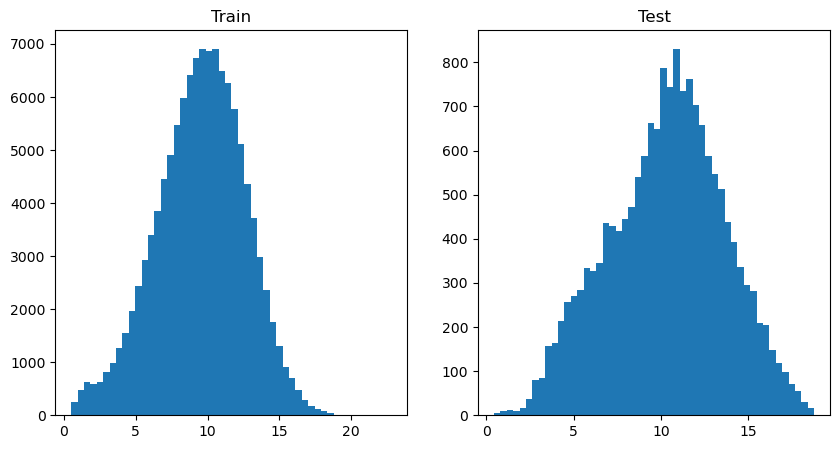

In [6]:
# distribution of ys
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(y_train, bins=50)
ax[0].set_title('Train')
ax[1].hist(y_test, bins=50)
ax[1].set_title('Test')
plt.show()

In [7]:
from scipy.stats import entropy, ks_2samp

# compare distribution of e data with kolmogorov smirnov test
for i in tqdm(range(len(e_train.columns))):
    # get KLD
    ks = ks_2samp(e_train.iloc[:, i], e_test.iloc[:, i])
    if ks.pvalue > 0.05:
        print(f'Column: {e_train.columns[i]}')
        print(f'KS p-value: {ks.pvalue}')
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
        ax[0].hist(e_train.iloc[:, i], bins=50)
        ax[0].set_title('Train')
        ax[1].hist(e_test.iloc[:, i], bins=50)
        ax[1].set_title('Test')
        plt.show()

  0%|          | 0/374 [00:00<?, ?it/s]

In [8]:
# # plot dists
# for i in tqdm(range(len(e_train.columns))):
#     print(f'Column: {e_train.columns[i]}')
#     fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
#     ax[0].hist(e_train.iloc[:, i])
#     ax[0].set_title('Train')
#     ax[1].hist(e_test.iloc[:, i])
#     ax[1].set_title('Test')
#     plt.show()

In [10]:
# scale data and plot again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
e_train_scaled = scaler.fit_transform(e_train)
e_test_scaled = scaler.transform(e_test)
# compare distribution of e data with kolmogorov smirnov test
for i in tqdm(range(len(e_train.columns))):
    # get KLD
    ks = ks_2samp(e_train_scaled[:, i], e_test_scaled[:, i])
    if ks.pvalue > 0.05:
        print(f'Column: {e_train.columns[i]}')
        print(f'KS p-value: {ks.pvalue}')
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
        ax[0].hist(e_train_scaled[:, i])
        ax[0].set_title('Train')
        ax[1].hist(e_test_scaled[:, i])
        ax[1].set_title('Test')
        plt.show()

  0%|          | 0/374 [00:00<?, ?it/s]